<a href="https://colab.research.google.com/github/ejunior89/Analise-de-dados-com-python-e-pandas-DIO/blob/main/Aula1_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

In [160]:
df1 = pd.read_excel("/content/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/datasets/Salvador.xlsx")

In [161]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [162]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [163]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [164]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
66,Aracaju,2018-01-01,76.59,1523,4
11,Aracaju,2019-01-01,161.53,1520,4
124,Salvador,2019-03-02,44.82,1034,3
43,Recife,2019-01-01,22.29,983,7
26,Fortaleza,2019-01-01,18.93,1005,2


In [165]:
#verificando os tipos de dados
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [166]:
df["LojaID"] = df["LojaID"].astype("object")
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [167]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [168]:
#consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [169]:
#substituindo os valores nulos por média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [170]:
# apagando as linhas com valores nulos
df.dropna(subset=["Vendas"], inplace=True)

In [171]:
#apagando as linhas com valores nulos com base em apenas 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [172]:
#removendo as linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

In [173]:
#criando a coluna receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [174]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [175]:
#retornando a maior receita
df["Receita"].max()

3544.0

In [176]:
#retornando a menor receita
df["Receita"].min()

3.34

In [177]:
#nLargest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [178]:
# nsamLlest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [179]:
#Agrupamento de cidades
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [180]:
# ordenando conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


Trabalhando com Datas

In [181]:
# Transformando a coluna de datas em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [182]:
# verificando o tipo de dado de cada coluna
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [183]:
# transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [184]:
# agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [185]:
# criando uma nova coluno com ano
df["Ano_Venda"] = df["Data"].dt.year

In [186]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
59,Aracaju,2018-01-01,15.07,1523,7,105.49,2018
98,Recife,2019-01-01,137.34,981,8,1098.72,2019
87,Recife,2019-01-01,210.06,983,4,840.24,2019
95,Natal,2019-01-02,5.13,1035,1,5.13,2019
50,Recife,2019-01-01,7.24,983,4,28.96,2019


In [187]:
# extraindo mês e dia
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [188]:
# calculando a diferença de dias
df["diferenca_dia"] = df["Data"] - df["Data"].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,diferenca_dia
134,Recife,2019-03-02,195.18,980,5,975.90,2019,425 days
218,Salvador,2019-01-02,189.12,1036,3,567.36,2019,366 days
208,Salvador,2019-01-02,39.40,1036,3,118.20,2019,366 days
21,Fortaleza,2019-01-01,40.63,1004,3,121.89,2019,365 days
115,Recife,2019-03-02,12.23,981,3,36.69,2019,425 days


In [189]:
# criando coluna de trimestre
df["trimestre"] = df["Data"].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,diferenca_dia,trimestre
101,Aracaju,2018-01-01,16.62,1520,9,149.58,2018,0 days,1
79,Recife,2019-01-01,14.53,983,6,87.18,2019,365 days,1
105,Recife,2019-01-01,41.12,980,3,123.36,2019,365 days,1
27,Salvador,2019-01-01,145.79,1034,1,145.79,2019,365 days,1
108,Aracaju,2018-01-01,31.94,1520,8,255.52,2018,0 days,1


In [190]:
# filtrando as vendas do mes de março de 2019
vendas_marco_2019 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [191]:
vendas_marco_2019.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,diferenca_dia,trimestre
134,Salvador,2019-03-02,125.90,1036,1,125.90,2019,425 days,1
116,Salvador,2019-03-02,41.78,1034,3,125.34,2019,425 days,1
129,Fortaleza,2019-03-02,35.34,982,7,247.38,2019,425 days,1
130,Fortaleza,2019-03-02,12.36,983,4,49.44,2019,425 days,1
138,Recife,2019-03-02,150.38,983,6,902.28,2019,425 days,1
74,Natal,2019-03-10,303.00,854,3,909.00,2019,433 days,1
121,Salvador,2019-03-02,100.70,1037,3,302.10,2019,425 days,1
125,Recife,2019-03-02,37.60,983,4,150.40,2019,425 days,1
132,Recife,2019-03-02,17.49,983,5,87.45,2019,425 days,1
108,Salvador,2019-03-02,11.72,1037,1,11.72,2019,425 days,1


visualizando dados

In [192]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<Axes: >

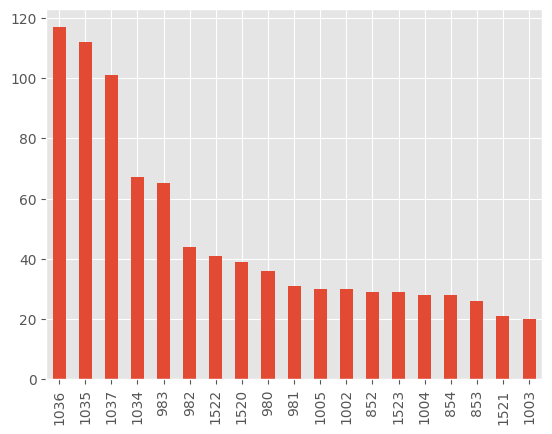

In [193]:
# gráficos de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

In [194]:
# gráficos de barras horizontais
df['LojaID'].value_counts(ascending=True).plot.barh

<bound method PlotAccessor.barh of <pandas.plotting._core.PlotAccessor object at 0x7b212bc85b10>>

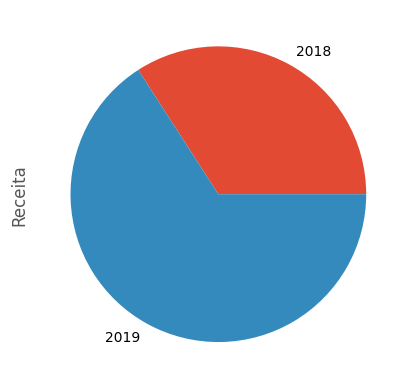

In [195]:
# gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [196]:
# venda por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

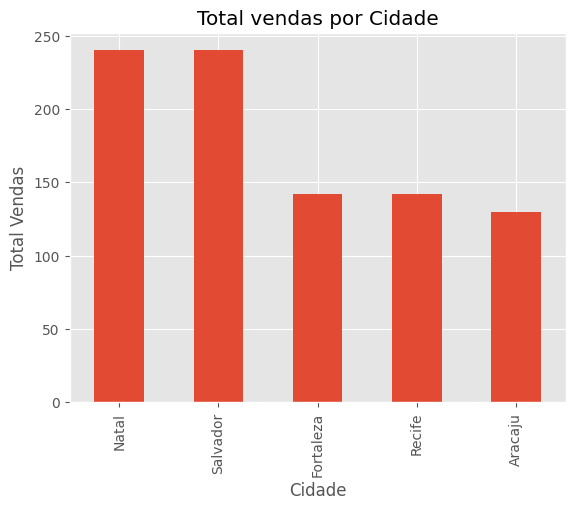

In [201]:
#adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

Text(0, 0.5, 'Total Vendas')

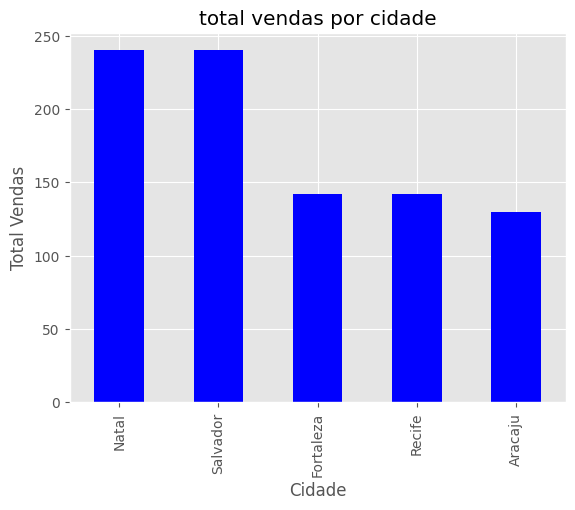

In [202]:
#alterando a cor
df["Cidade"].value_counts().plot.bar(title="total vendas por cidade", color="blue")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

In [203]:
#alterando o estilo
plt.style.use("ggplot")

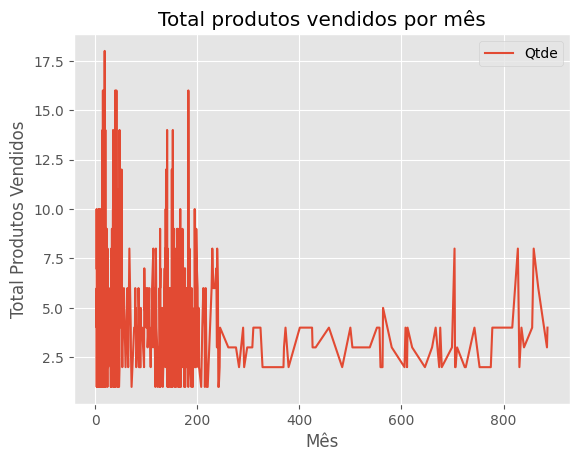

In [205]:
df.groupby(df["Vendas"])["Qtde"].sum().plot(title = "Total produtos vendidos por mês" )
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

In [206]:
df.groupby(df["Vendas"])["Qtde"].sum()

Vendas
3.01       7
3.10      10
3.34       1
3.39       6
3.49       4
          ..
856.00     4
859.00     8
868.00     6
885.00     3
886.00     4
Name: Qtde, Length: 679, dtype: int64

In [207]:
# selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

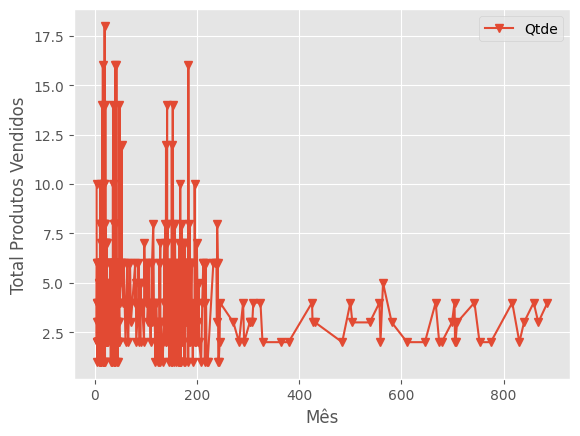

In [208]:
#total produtos vendidos por mês
df_2019.groupby(df_2019["Vendas"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

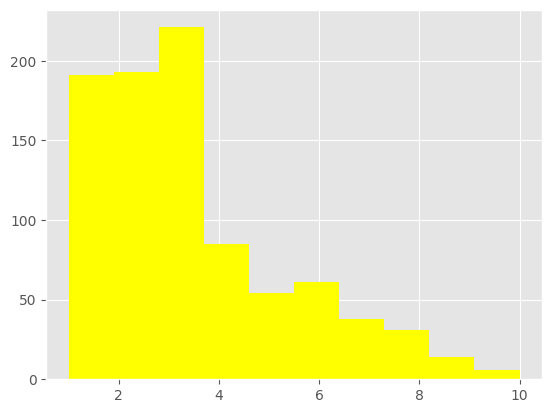

In [209]:
#misograma
plt.hist(df["Qtde"], color="yellow");

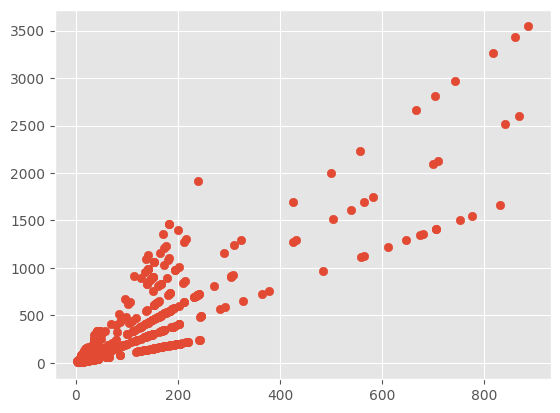

In [211]:
plt.scatter(x=df_2019["Vendas"],y = df_2019["Receita"]);

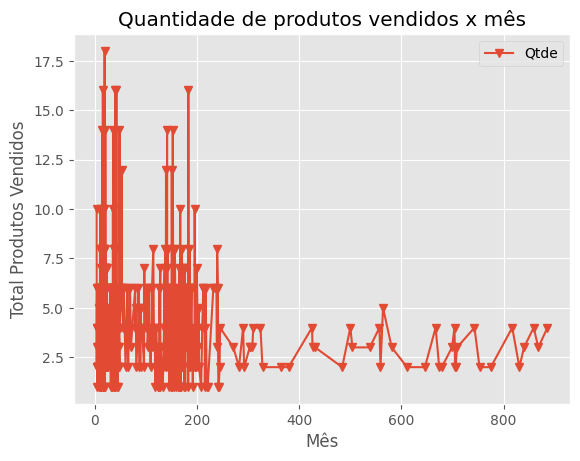

In [212]:
#Salvando em png
df_2019.groupby(df_2019["Vendas"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")